- [final_model = LinearRegression()](#deploy)
<br>[final_model.fit(X, y)](#deploy)
- [final_model.coef_](#coeff)
<br>[final_model.intercept_](#coeff)
- [from joblib import dump, load](#dumpload)
<br>[dump(final_model, 'write_model_name.joblib')](#dumpload)
<br>[loaded_model = load('write_model_name.joblib')](#dumpload)
<br>[loaded_model.coef_](#dumpload)
<br>[loaded_model.intercept_](#dumpload)
<br>[loaded_model.predict(new_dataset)](#dumpload)

---

__Model Deployment__
   - we're talking about __saving and loading the model for future use__.

----

In [1]:
from PIL import Image

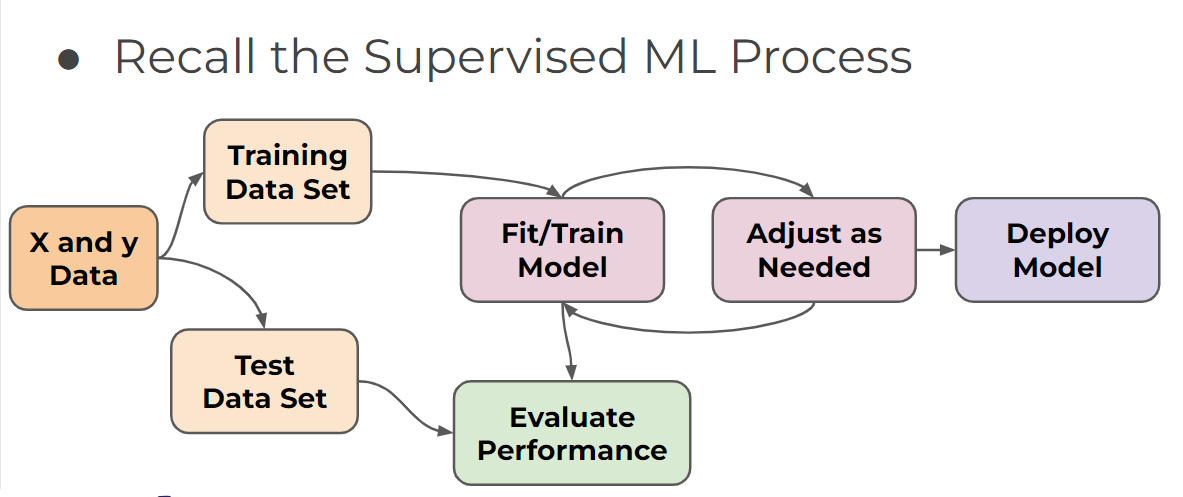

In [2]:
Image.open('mlprocess.png')

- So later on, we will be exploring __polynomial regression__, which allows us to adjust the hyperparameter of what order of polynomial we're looking at.

- And we'll also take a look at __regularization__, which has its own coefficient values, as well as different types of regularization.

So those will all be __future model adjustments__ we can perform __on top of linear regression__.

---

Right now we're basically going to skip the step of adjusting the parameters and instead we're going to pretend that we've been fully satisfied by the test metrics for the performance. And in that case, the next step would be __deployment__. (save the model, load it and then apply it to new data)

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('Advertising.csv')

In [5]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [6]:
X = df.drop('sales', axis=1)
y = df['sales']

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
model = LinearRegression()

In [11]:
model.fit(X_train, y_train)

LinearRegression()

In [12]:
test_predictions = model.predict(X_test)

In [13]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [15]:
MAE = mean_absolute_error(y_test, test_predictions)
MAE

1.2137457736144808

In [18]:
MSE = mean_squared_error(y_test, test_predictions)
MSE

2.298716697886378

In [19]:
RMSE = np.sqrt(MSE)
RMSE

1.5161519375993877

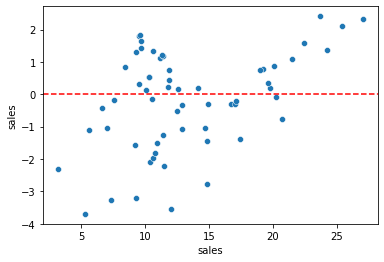

In [26]:
sns.scatterplot(x=y_test, y=y_test - test_predictions)
plt.axhline(y=0, c='r', ls='--')

<AxesSubplot:xlabel='sales', ylabel='Density'>

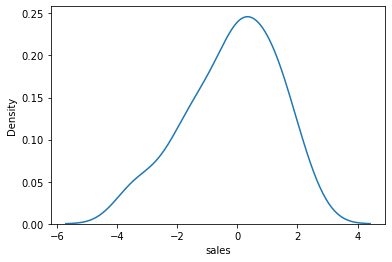

In [27]:
sns.kdeplot(y_test - test_predictions)

We took a look at the residuals and based off the residual plot, we decided linear regression was a valid choice. There was no clear curve or pattern here. It does look pretty random.

---

<a id='deploy'></a>
## Model Deployment

And suppose, we decided through some method that these performance metrics are good enough for us that we're ready to retrain the model on all the data and deploy it to the real world.
<br> So, I'm going to create a new model instance.

In [29]:
final_model = LinearRegression()

# And in general, this should basically be the exact same model type with the same parameters as your model 
# that you adjusted or kept adjusting for optimal performance on the test set.

In [30]:
final_model.fit(X, y)

# for the final model we fit it on all the data.

LinearRegression()

<a id='coeff'></a>
### `Coefficients`

In [33]:
final_model.coef_

# These are the beta coefficients of the linear regression model.
# They come in the same order as the feature dataframe that you passed in.

array([ 0.04576465,  0.18853002, -0.00103749])

In [57]:
X.head(1)

,TV,radio,newspaper
0,230.1,37.8,69.2


In [64]:
final_model.intercept_

# b0^

2.9388893694594085

The coefficient for newspaper spend is almost zero (-0.00103749). 
<br>If it was a pure zero, that means regardless of what you spend on newspaper advertising, the model thinks it doesn't even matter and it's just going to give it a weight of zero, meaning it's going to __completely cancel out__ any value that you __spend on newspaper advertising__.

TV spend coefficient is 0.04576465, which means if you were to hold the other features fixed - so, if you hold the radio fixed and newspaper fixed and only adjust TV, every time you adjust TV by one unit, that is a one unit increase in TV spend, holding radio and newspaper fixed, that means we would expect an increase of 0.04576465 in sales.

* Holding all other features fixed, a 1 unit (A thousand dollars) increase in TV Spend is associated with an increase in sales of  0.045 "sales units", in this case 1000s of units . 
* This basically means that for every $1000 dollars spend on TV Ads, we could expect 45 more units sold.

For negative coefficients, it's actually technically the opposite. Holding, TV and radio fixed, for every unit increase you spend on newspaper advertising, you actually expect a drop in sales and you expect a drop of 0.00103749 sales units.

And I keep using the word units. It's easier to think of the coefficients as just relationships between __a one unit increase of the feature causing this unit increase for the particular label__.



---

In [35]:
y_hat = final_model.predict(X)

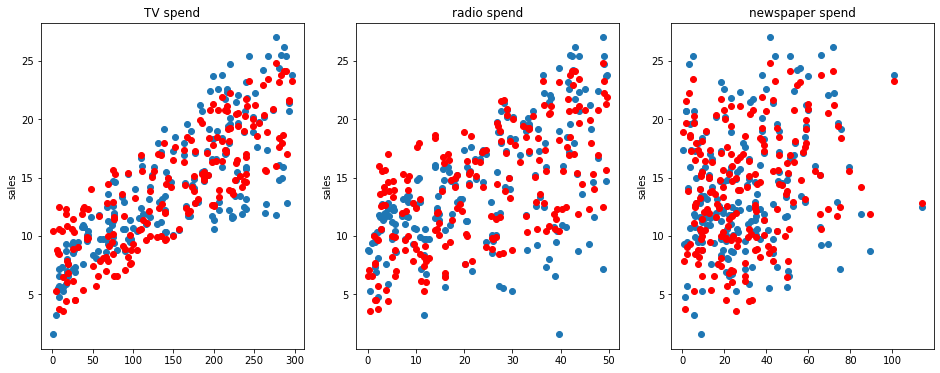

In [40]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 6))

axes[0].plot(df['TV'], df['sales'], 'o')
axes[0].plot(df['TV'], y_hat, 'o', c='r')
axes[0].set_title('TV spend')
axes[0].set_ylabel('sales')

axes[1].plot(df['radio'], df['sales'], 'o')
axes[1].plot(df['radio'], y_hat, 'o', c='r')
axes[1].set_title('radio spend')
axes[1].set_ylabel('sales')

axes[2].plot(df['newspaper'], df['sales'], 'o')
axes[2].plot(df['newspaper'], y_hat, 'o', c='r')
axes[2].set_title('newspaper spend')
axes[2].set_ylabel('sales');

And then I don't get exactly a line, but instead I just get my predicted points against my true points, and keep in mind, the prediction points are in red and the true points are default blue. Again, it's kind of almost impossible to actually draw a line here because you're dealing with more than just one feature. And really more than three features, the above plot also becomes less useful.

---

Recall that for this particular data set, the units of TV, radio and newspaper all happened to be in the same units. So keep in mind, in the real world, it's very unlikely that all your features happen to conveniently share the same number of units, which allows for very convenient interpretations of the coefficients without having to do any normalization.

---

<a id='dumpload'></a>

In [41]:
from joblib import dump, load

In [43]:
dump(final_model, 'final_sales_model.joblib')

# 'final_sales_model' - whatever you want to call your model

# this is essentially now a trained model file that's going to be saved on your computer 
# that you could then send to somebody.

['final_sales_model.joblib']

In [44]:
loaded_model = load('final_sales_model.joblib')

In [46]:
loaded_model # my trained regression model

LinearRegression()

In [48]:
loaded_model.coef_

# So, this is the exact same model. It's already trained for us.

array([ 0.04576465,  0.18853002, -0.00103749])

In [63]:
loaded_model.intercept_

2.9388893694594085

So, for the final test, let's go ahead and predict the sales value for some campaign. Let's go ahead and make up a new advertising campaign.

Something to __keep in mind__ is the shape of your features that you trained on. In our case, the shape is two dimensional. An example campaign will also need to have a two dimensional shape.

In [50]:
campaign = [[149, 22, 12]]

How many sales do we expect to get off of this? Luckily for you, your friend just sent you this model that you've already loaded up.

In [52]:
loaded_model.predict(campaign)

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([13.893032])

How accurate is this prediction? You actually have no way of knowing, since this is completely new data that the model has never seen before, we just essentially made it up.

But we do know that this same model on stuff it's never seen before, more or less will perform at with a mean absolute error of 1.21 and a root mean square of 1.51.

In [56]:
MAE, RMSE

(1.2137457736144808, 1.5161519375993877)

So, you can roughly assume the similar performance for our loaded_model on new data, as long as the new data is more or less in the range of existing data.

---